FEATURE SELECTION TECHNIQUE


In [1]:
import pandas as pd
df = pd.read_csv('mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# univariate selectioin

In [ ]:
#dependent and independent feature

In [3]:
import pandas as pd

# Load your dataset into a pandas DataFrame (replace 'your_dataset.csv' with your dataset path)
data = pd.read_csv('mobile_dataset.csv')

# Splitting the dataset into independent (X) and dependent (y) features
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column




In [5]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [7]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset into a pandas DataFrame (replace 'your_dataset.csv' with your dataset path)
data = pd.read_csv('mobile_dataset.csv')

# Step 1: Train-Test Split
X = data.iloc[:, :-1]  # Independent features
y = data.iloc[:, -1]   # Dependent feature

# Splitting the dataset into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Selection using Chi-square with SelectKBest
# Define the number of features you want to select (in this case, 10)
k = 10
# Create the SelectKBest object with the chi2 scoring function
selector = SelectKBest(score_func=chi2, k=k)
# Fit the selector to the training data
X_train_selected = selector.fit_transform(X_train, y_train)
# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Step 3: Training and Testing with Selected Features
# Initialize a RandomForestClassifier (or any other classifier of your choice)
clf = RandomForestClassifier(random_state=42)
# Train the classifier on the selected features
clf.fit(X_train_selected, y_train)
# Transform the testing data to only include selected features
X_test_selected = X_test.iloc[:, selected_indices]
# Make predictions on the testing set
y_pred = clf.predict(X_test_selected)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the testing set with selected features:", accuracy)
print("Selected features:", selected_features)


Accuracy on the testing set with selected features: 0.915
Selected features: Index(['battery_power', 'fc', 'int_memory', 'mobile_wt', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'],
      dtype='object')


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset into a pandas DataFrame (replace 'your_dataset.csv' with your dataset path)
data = pd.read_csv('mobile_dataset.csv')

# Step 1: Train-Test Split
X = data.iloc[:, :-1]  # Independent features
y = data.iloc[:, -1]   # Dependent feature

# Splitting the dataset into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Selection using Chi-square with SelectKBest
# Define the number of features you want to select (in this case, 10)
k = 10
# Create the SelectKBest object with the chi2 scoring function
selector = SelectKBest(score_func=chi2, k=k)
# Fit the selector to the training data
X_train_selected = selector.fit_transform(X_train, y_train)
# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
# Get the names of the selected features
selected_features = X.columns[selected_indices]
# Get the feature selection scores
feature_scores = selector.scores_

# Print the top 10 selected features along with their scores
print("Top 10 selected features and their scores:")
for feature, score in zip(selected_features, feature_scores[selected_indices]):
    print(feature, ":", score)

# Step 3: Training and Testing with Selected Features
# Initialize a RandomForestClassifier (or any other classifier of your choice)
clf = RandomForestClassifier(random_state=42)
# Train the classifier on the selected features
clf.fit(X_train_selected, y_train)
# Transform the testing data to only include selected features
X_test_selected = X_test.iloc[:, selected_indices]
# Make predictions on the testing set
y_pred = clf.predict(X_test_selected)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy on the testing set with selected features:", accuracy)


Top 10 selected features and their scores:
battery_power : 10409.500168355753
fc : 13.907023364229703
int_memory : 152.18192286150747
mobile_wt : 84.83311070035103
px_height : 12684.78999412857
px_width : 7037.438746923945
ram : 739905.5574004402
sc_h : 8.979860417218598
sc_w : 9.787287512972522
talk_time : 12.4527752822312

Accuracy on the testing set with selected features: 0.915


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset into a pandas DataFrame (replace 'your_dataset.csv' with your dataset path)
data = pd.read_csv('mobile_dataset.csv')

# Step 1: Train-Test Split
X = data.iloc[:, :-1]  # Independent features
y = data.iloc[:, -1]   # Dependent feature

# Splitting the dataset into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Selection using Chi-square with SelectKBest
# Define the number of features you want to select (in this case, 10)
k = 10
# Create the SelectKBest object with the chi2 scoring function
selector = SelectKBest(score_func=chi2, k=k)
# Fit the selector to the training data
X_train_selected = selector.fit_transform(X_train, y_train)
# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
# Get the names of the selected features
selected_features = X.columns[selected_indices]
# Get the feature selection scores
feature_scores = selector.scores_

# Print the top 10 selected features along with their scores
print("Top 10 selected features and their scores:")
for feature, score in zip(selected_features, feature_scores[selected_indices]):
    print(feature, ":", score)

# Step 3: Training and Testing with Selected Features
# Initialize a RandomForestClassifier (or any other classifier of your choice)
clf = RandomForestClassifier(random_state=42)
# Train the classifier on the selected features
clf.fit(X_train_selected, y_train)
# Transform the testing data to only include selected features
X_test_selected = X_test.iloc[:, selected_indices]
# Make predictions on the testing set
y_pred = clf.predict(X_test_selected)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy on the testing set with selected features:", accuracy)




Top 10 selected features and their scores:
battery_power : 10409.500168355753
fc : 13.907023364229703
int_memory : 152.18192286150747
mobile_wt : 84.83311070035103
px_height : 12684.78999412857
px_width : 7037.438746923945
ram : 739905.5574004402
sc_h : 8.979860417218598
sc_w : 9.787287512972522
talk_time : 12.4527752822312

Accuracy on the testing set with selected features: 0.915


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [13]:
feature_importances = clf.feature_importances_
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Print the feature importances
print("\nFeature importances:")
print(feature_importance_df)



Feature importances:
         Feature  Importance
6            ram    0.585443
0  battery_power    0.094563
5       px_width    0.066524
4      px_height    0.064914
3      mobile_wt    0.041051
2     int_memory    0.037992
9      talk_time    0.030724
7           sc_h    0.027841
8           sc_w    0.026445
1             fc    0.024502


In [17]:
from sklearn.ensemble import ExtraTreesClassifier
feature_importances = clf.feature_importances_
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


Top 10 selected features and their scores:
battery_power : 10409.500168355753
fc : 13.907023364229703
int_memory : 152.18192286150747
mobile_wt : 84.83311070035103
px_height : 12684.78999412857
px_width : 7037.438746923945
ram : 739905.5574004402
sc_h : 8.979860417218598
sc_w : 9.787287512972522
talk_time : 12.4527752822312


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(



Accuracy on the testing set with selected features: 0.92


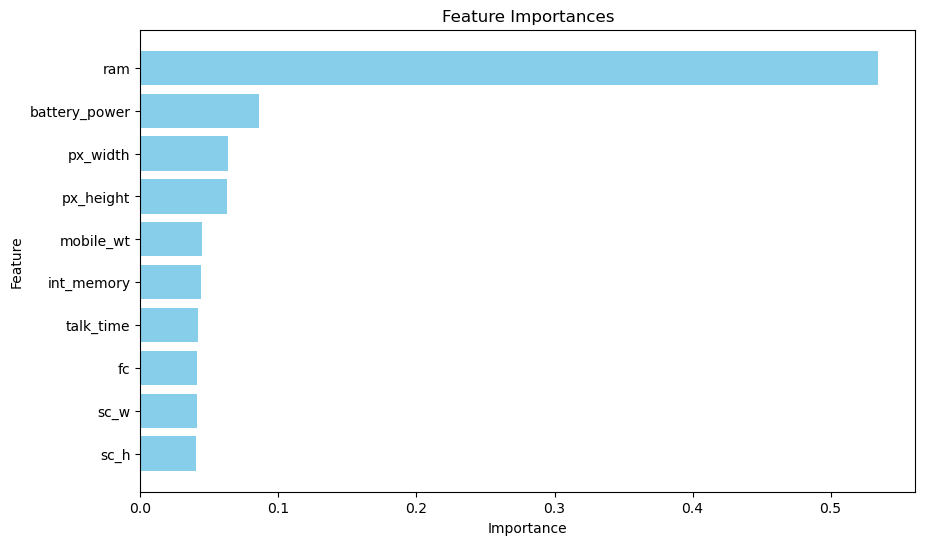

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Load your dataset into a pandas DataFrame (replace 'your_dataset.csv' with your dataset path)
data = pd.read_csv('mobile_dataset.csv')

# Step 1: Train-Test Split
X = data.iloc[:, :-1]  # Independent features
y = data.iloc[:, -1]   # Dependent feature

# Splitting the dataset into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Selection using Chi-square with SelectKBest
# Define the number of features you want to select (in this case, 10)
k = 10
# Create the SelectKBest object with the chi2 scoring function
selector = SelectKBest(score_func=chi2, k=k)
# Fit the selector to the training data
X_train_selected = selector.fit_transform(X_train, y_train)
# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
# Get the names of the selected features
selected_features = X.columns[selected_indices]
# Get the feature selection scores
feature_scores = selector.scores_

# Print the top 10 selected features along with their scores
print("Top 10 selected features and their scores:")
for feature, score in zip(selected_features, feature_scores[selected_indices]):
    print(feature, ":", score)

# Step 3: Training and Testing with Selected Features
# Initialize an ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=42)
# Train the classifier on the selected features
clf.fit(X_train_selected, y_train)
# Transform the testing data to only include selected features
X_test_selected = X_test.iloc[:, selected_indices]
# Make predictions on the testing set
y_pred = clf.predict(X_test_selected)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy on the testing set with selected features:", accuracy)

# Step 4: Assessing Feature Importance with ExtraTreesClassifier
# Get feature importances
feature_importances = clf.feature_importances_
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 5: Plotting Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


In [20]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


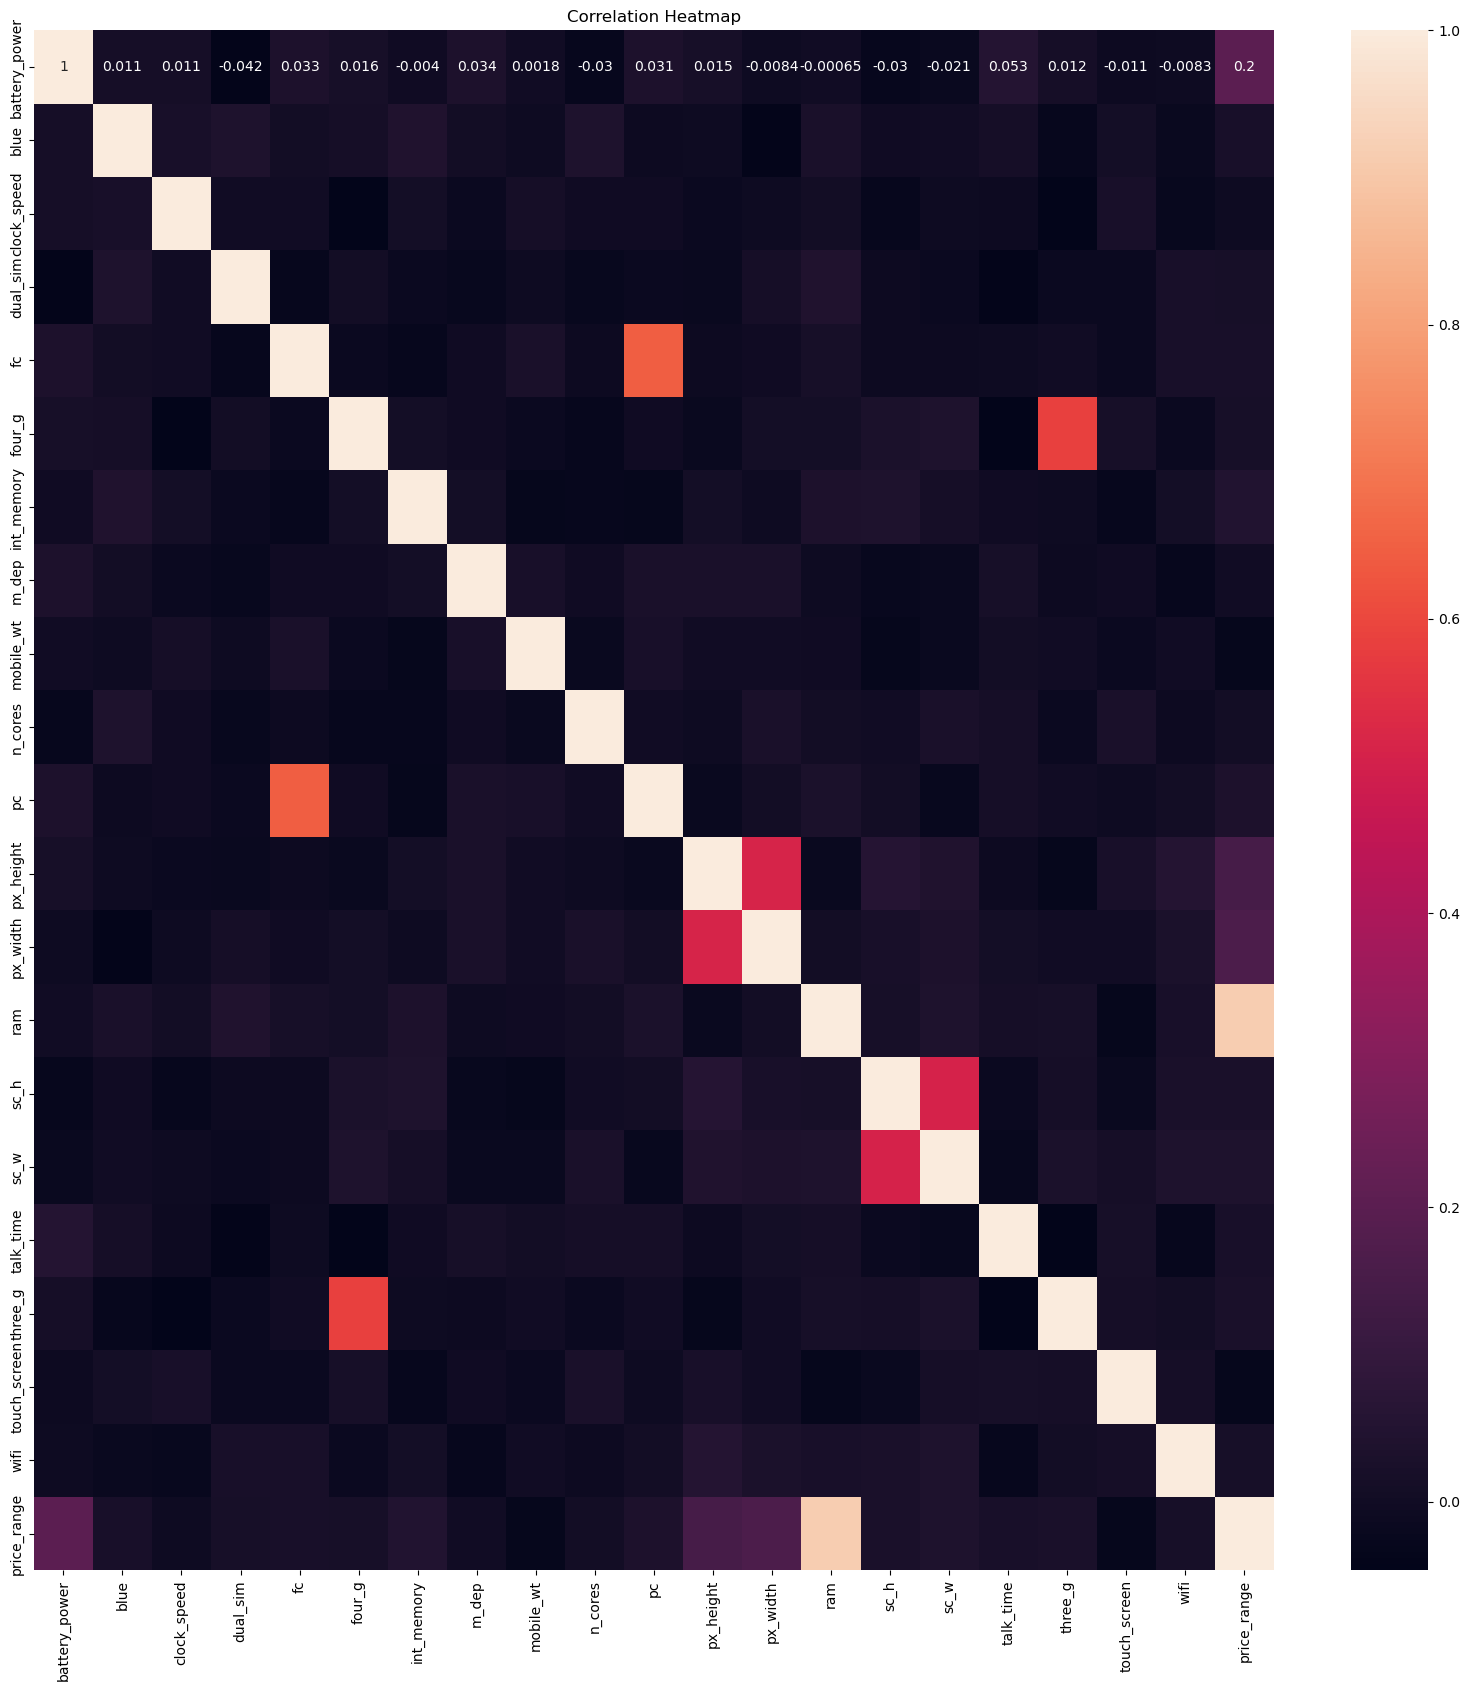

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame (replace 'your_dataset.csv' with your dataset path)
data = pd.read_csv('mobile_dataset.csv')

# Compute the correlation matrix
corr_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True)

# Add a title to the plot
plt.title('Correlation Heatmap')

# Show plot
plt.show()


<Axes: >

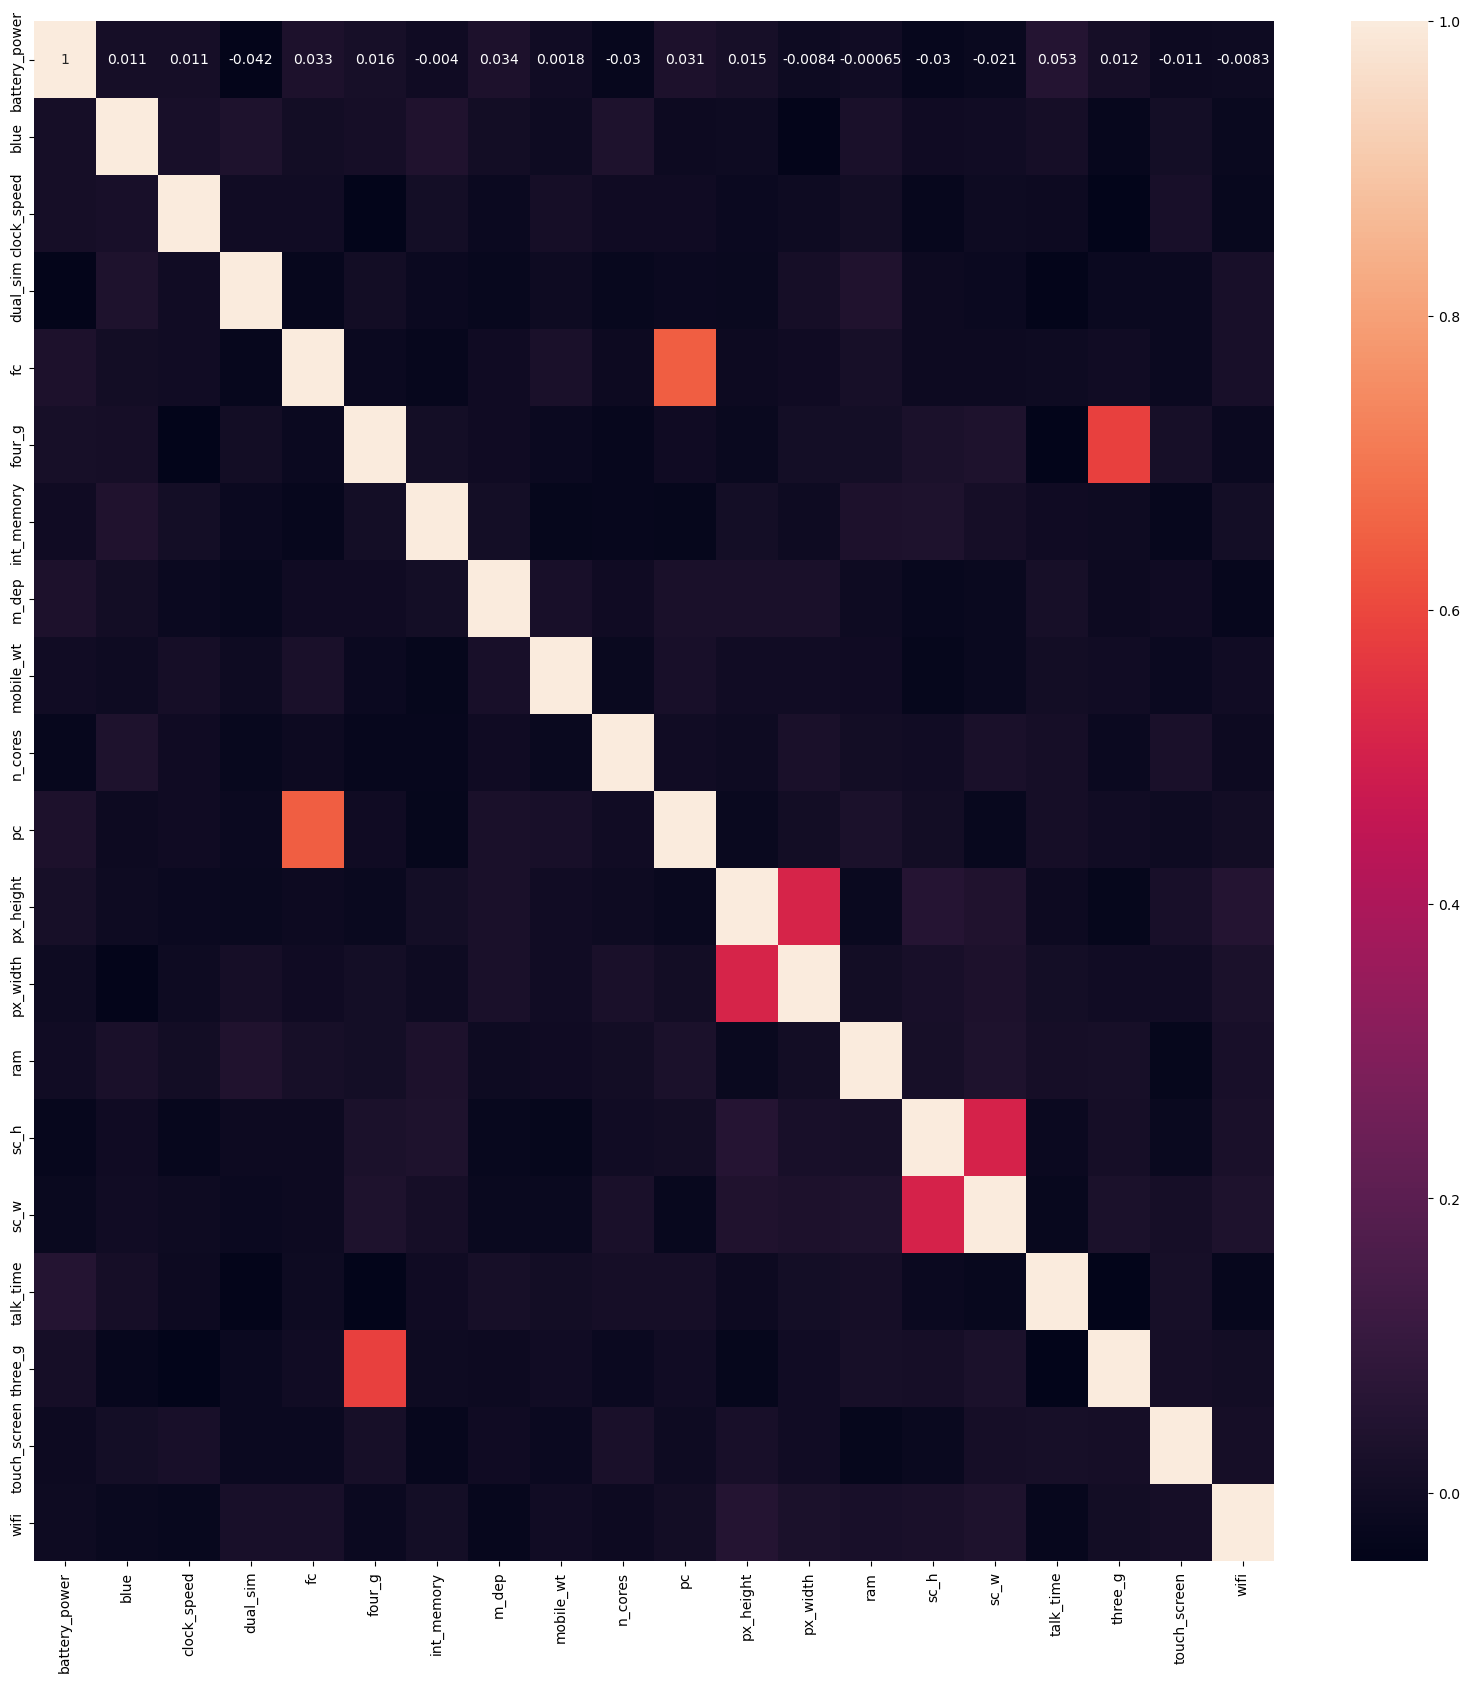

In [26]:
import seaborn as sns
corr=data.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_features].corr(),annot=True)

In [35]:
import pandas as pd

# Load your dataset into a pandas DataFrame (replace 'your_dataset.csv' with your dataset path)
data = pd.read_csv('mobile_dataset.csv')

# Assuming the last column contains the dependent feature and the rest are independent features
X = data.iloc[:, :-1]  # Independent features
y = data.iloc[:, -1]   # Dependent feature

# Calculate Pearson correlation coefficients between independent features and the target variable
correlation_with_y = X.corrwith(y)

# Set the threshold for correlation
threshold = 0.2

# Select features with correlation coefficient above the threshold
selected_features = correlation_with_y[abs(correlation_with_y) > threshold].index.tolist()

# Print selected features
print("Selected features with correlation coefficient > 0.5:")
print(selected_features)


Selected features with correlation coefficient > 0.5:
['battery_power', 'ram']


In [ ]:
#pearsoncorrelation


In [37]:
threshold=0.5
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
correlation(data.iloc[:,:-1],threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

In [ ]:
#mutual information classifier

In [38]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load your dataset into a pandas DataFrame (replace 'your_dataset.csv' with your dataset path)
data = pd.read_csv('mobile_dataset.csv')

# Assuming 'X' contains independent features and 'y' contains the dependent feature
X = data.iloc[:, :-1]  # Independent features
y = data.iloc[:, -1]  # Dependent feature

# Perform feature selection using Mutual Information
# Define the number of features you want to select (e.g., 10)
k = 10
# Create the SelectKBest object with mutual information scoring function
selector = SelectKBest(score_func=mutual_info_classif, k=k)
# Fit the selector to the data
X_selected = selector.fit_transform(X, y)
# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)
# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Print selected features
print("Selected features using Mutual Information:")
print(selected_features)


Selected features using Mutual Information:
Index(['battery_power', 'blue', 'fc', 'mobile_wt', 'px_height', 'px_width',
       'ram', 'talk_time', 'three_g', 'wifi'],
      dtype='object')
